In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim
import random
import time
import os
import copy
import pickle
import glob
import scipy.io as sio
from scipy import ndimage
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

# mounting google drive folder
from google.colab import drive
drive.mount('/content/gdrive')

cuda:0
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


50000 10000 10000

Epoch 0/19
----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


....train loss: 2.294
....valid loss: 2.295

Epoch 1/19
----------
....train loss: 2.256
....valid loss: 2.255

Epoch 2/19
----------
....train loss: 0.844
....valid loss: 0.783

Epoch 3/19
----------
....train loss: 0.422
....valid loss: 0.387

Epoch 4/19
----------
....train loss: 0.359
....valid loss: 0.325

Epoch 5/19
----------
....train loss: 0.279
....valid loss: 0.256

Epoch 6/19
----------
....train loss: 0.234
....valid loss: 0.215

Epoch 7/19
----------
....train loss: 0.214
....valid loss: 0.200

Epoch 8/19
----------
....train loss: 0.186
....valid loss: 0.179

Epoch 9/19
----------
....train loss: 0.164
....valid loss: 0.157

Epoch 10/19
----------
....train loss: 0.139
....valid loss: 0.137

Epoch 11/19
----------
....train loss: 0.128
....valid loss: 0.126

Epoch 12/19
----------
....train loss: 0.117
....valid loss: 0.129

Epoch 13/19
----------
....train loss: 0.115
....valid loss: 0.122

Epoch 14/19
----------
....train loss: 0.095
....valid loss: 0.102

Epoch 15/19


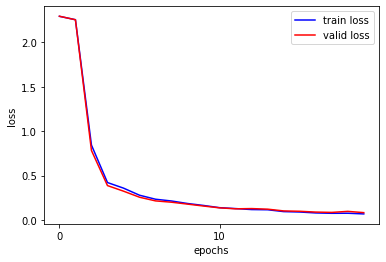

--------------- EVALUATION ---------------
(16, 1, 28, 28) (10000, 1, 28, 28) (10000, 10)
Number of errors: 238	
(10000,)
(10000,)
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.96       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

--------------- CHECKING ERRORS ---------------



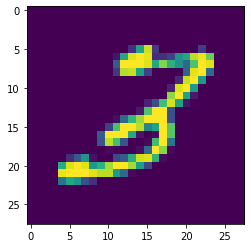

Prediction: 2 - Label: 3.0	


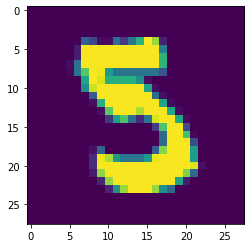

Prediction: 3 - Label: 5.0	


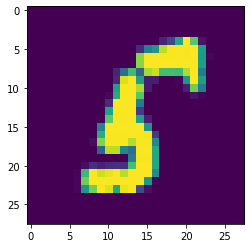

Prediction: 8 - Label: 5.0	


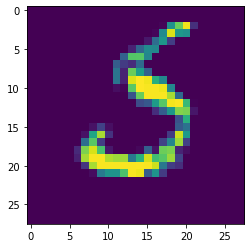

Prediction: 3 - Label: 5.0	


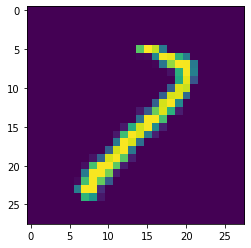

Prediction: 2 - Label: 7.0	


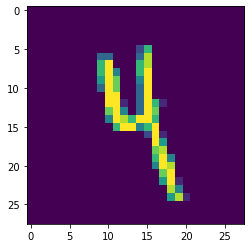

Prediction: 9 - Label: 4.0	


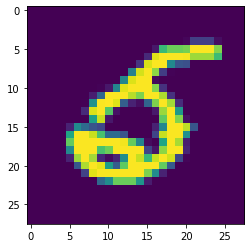

Prediction: 6 - Label: 5.0	


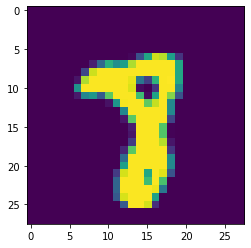

Prediction: 3 - Label: 8.0	


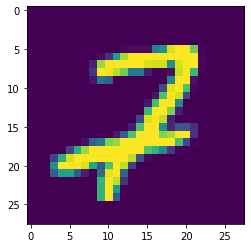

Prediction: 2 - Label: 7.0	


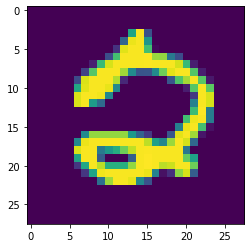

Prediction: 0 - Label: 2.0	


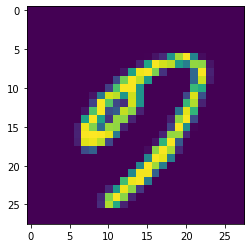

Prediction: 0 - Label: 9.0	


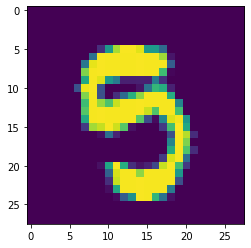

Prediction: 9 - Label: 5.0	


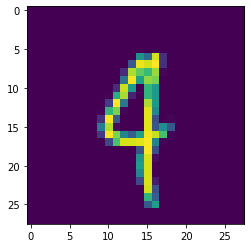

Prediction: 9 - Label: 4.0	


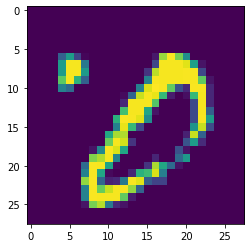

Prediction: 8 - Label: 0.0	


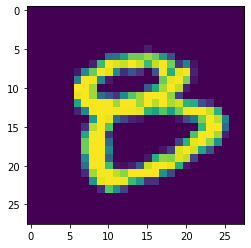

Prediction: 0 - Label: 8.0	


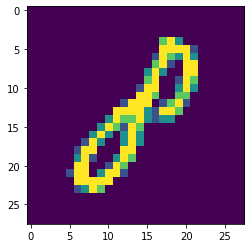

Prediction: 1 - Label: 8.0	


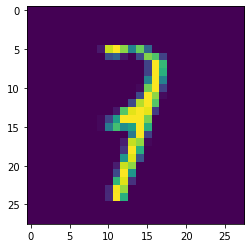

Prediction: 1 - Label: 7.0	


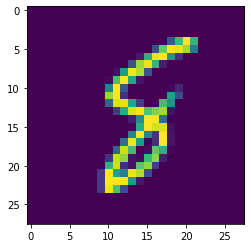

Prediction: 5 - Label: 8.0	


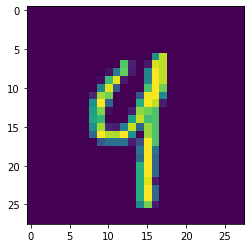

Prediction: 9 - Label: 4.0	


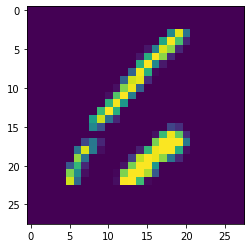

Prediction: 5 - Label: 6.0	


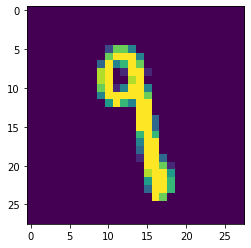

Prediction: 1 - Label: 9.0	


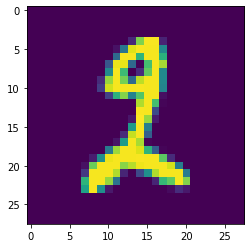

Prediction: 1 - Label: 2.0	


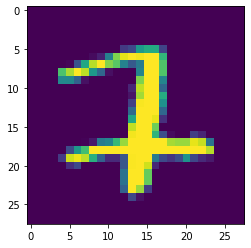

Prediction: 2 - Label: 7.0	


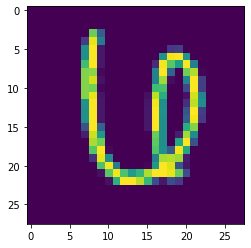

Prediction: 0 - Label: 6.0	


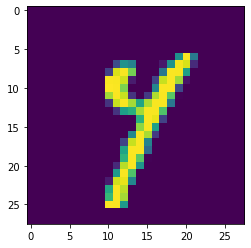

Prediction: 7 - Label: 4.0	


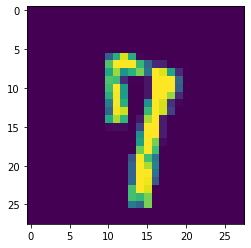

Prediction: 9 - Label: 7.0	


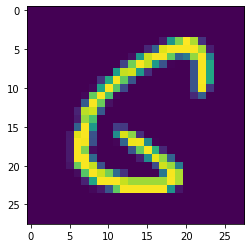

Prediction: 2 - Label: 6.0	


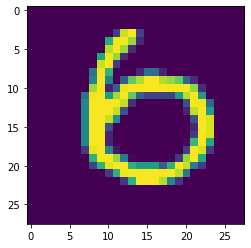

Prediction: 0 - Label: 6.0	


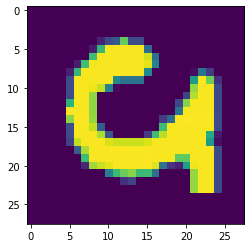

Prediction: 0 - Label: 9.0	


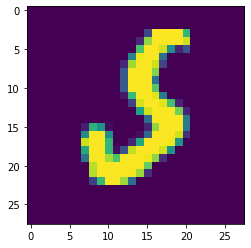

Prediction: 6 - Label: 5.0	


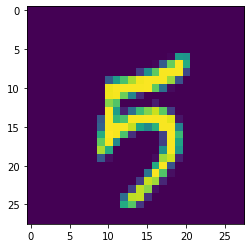

Prediction: 9 - Label: 5.0	


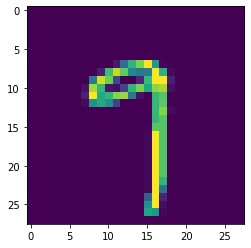

Prediction: 7 - Label: 9.0	


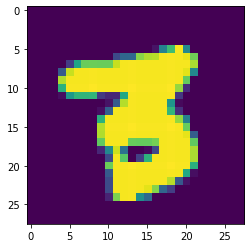

Prediction: 8 - Label: 3.0	


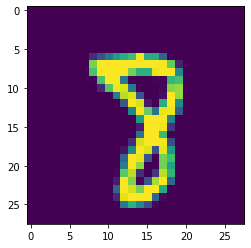

Prediction: 3 - Label: 8.0	


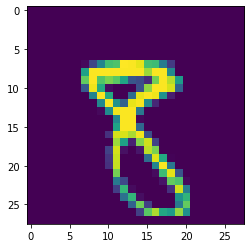

Prediction: 3 - Label: 8.0	


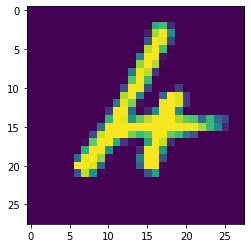

Prediction: 6 - Label: 4.0	


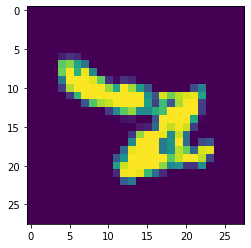

Prediction: 7 - Label: 2.0	


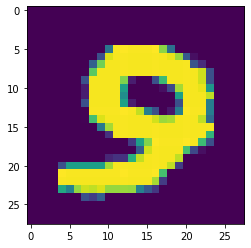

Prediction: 8 - Label: 9.0	


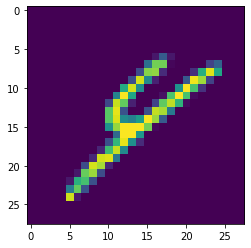

Prediction: 8 - Label: 4.0	


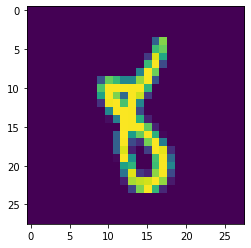

Prediction: 1 - Label: 8.0	


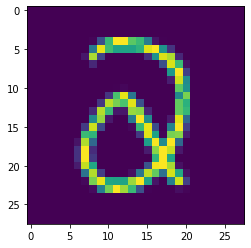

Prediction: 3 - Label: 2.0	


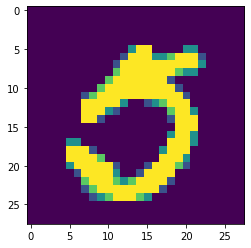

Prediction: 0 - Label: 5.0	


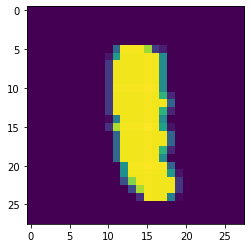

Prediction: 8 - Label: 1.0	


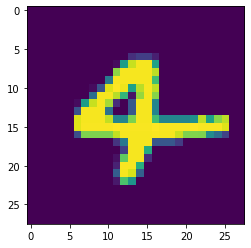

Prediction: 2 - Label: 4.0	


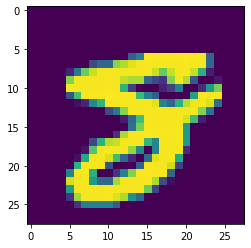

Prediction: 3 - Label: 8.0	


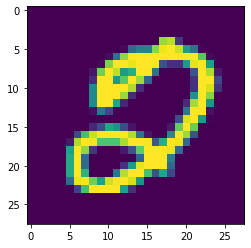

Prediction: 0 - Label: 2.0	


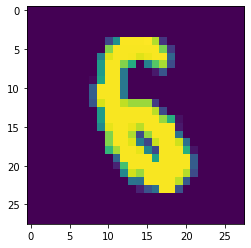

Prediction: 8 - Label: 6.0	


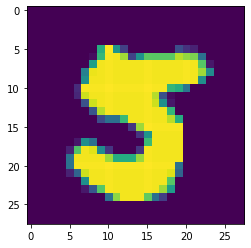

Prediction: 8 - Label: 5.0	


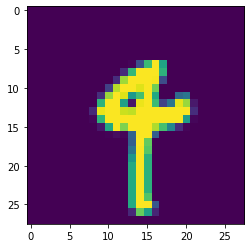

Prediction: 9 - Label: 4.0	


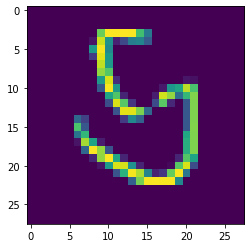

Prediction: 6 - Label: 5.0	


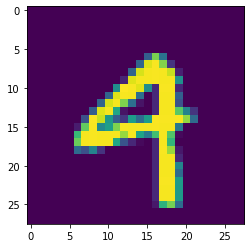

Prediction: 9 - Label: 4.0	


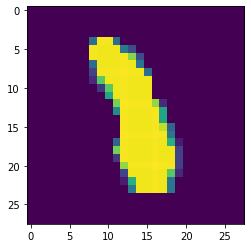

Prediction: 8 - Label: 1.0	


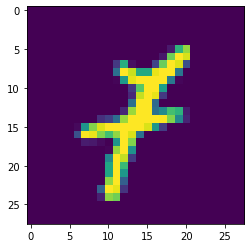

Prediction: 1 - Label: 7.0	


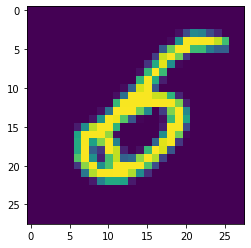

Prediction: 6 - Label: 5.0	


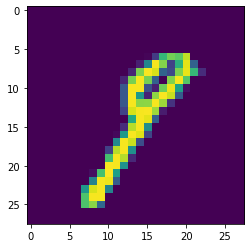

Prediction: 1 - Label: 9.0	


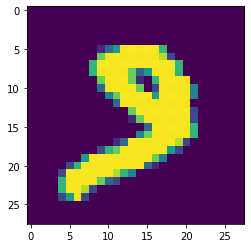

Prediction: 3 - Label: 9.0	


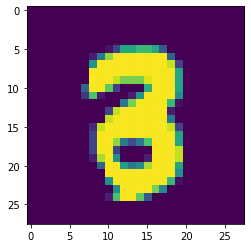

Prediction: 8 - Label: 3.0	


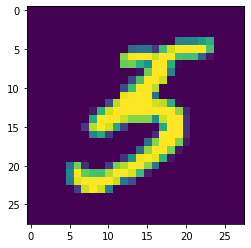

Prediction: 3 - Label: 5.0	


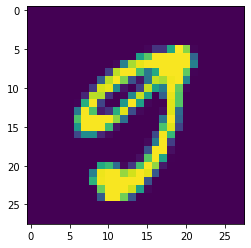

Prediction: 0 - Label: 9.0	


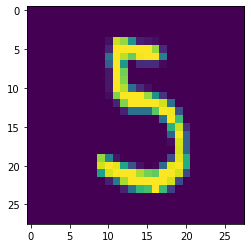

Prediction: 3 - Label: 5.0	


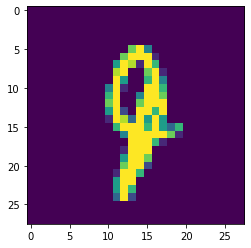

Prediction: 4 - Label: 9.0	


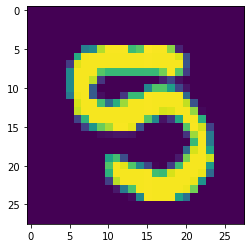

Prediction: 8 - Label: 5.0	


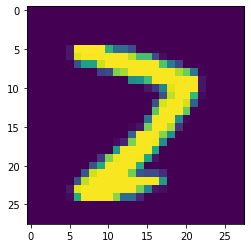

Prediction: 2 - Label: 7.0	


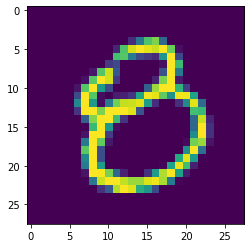

Prediction: 0 - Label: 8.0	


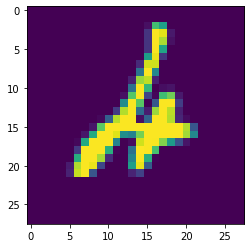

Prediction: 2 - Label: 4.0	


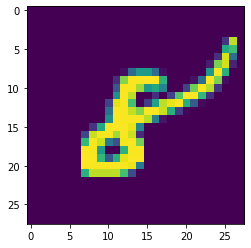

Prediction: 5 - Label: 8.0	


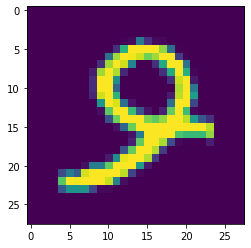

Prediction: 2 - Label: 9.0	


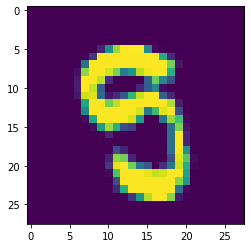

Prediction: 3 - Label: 5.0	


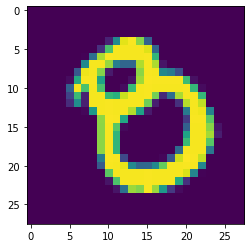

Prediction: 0 - Label: 8.0	


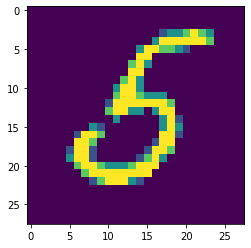

Prediction: 6 - Label: 5.0	


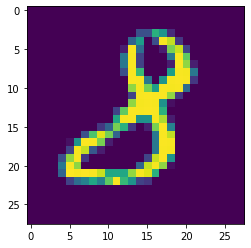

Prediction: 3 - Label: 8.0	


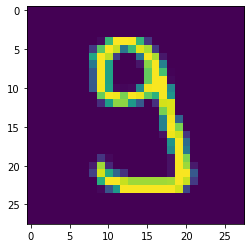

Prediction: 3 - Label: 9.0	


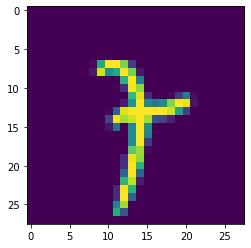

Prediction: 9 - Label: 7.0	


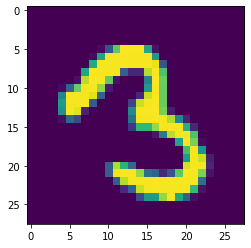

Prediction: 8 - Label: 3.0	


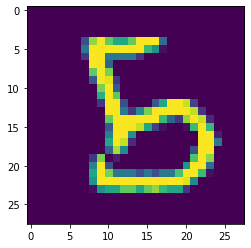

Prediction: 8 - Label: 5.0	


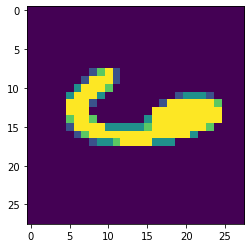

Prediction: 4 - Label: 6.0	


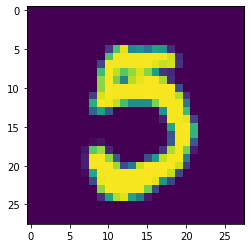

Prediction: 3 - Label: 5.0	


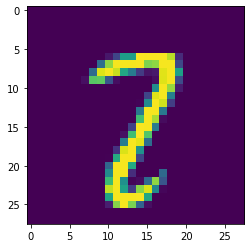

Prediction: 7 - Label: 2.0	


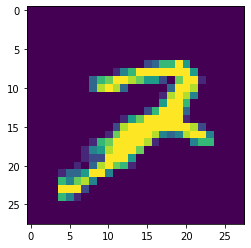

Prediction: 7 - Label: 2.0	


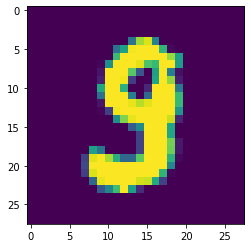

Prediction: 8 - Label: 9.0	


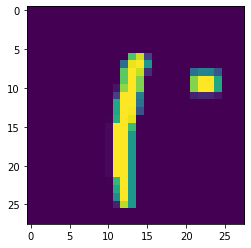

Prediction: 8 - Label: 1.0	


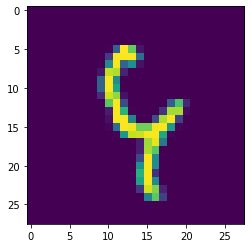

Prediction: 4 - Label: 9.0	


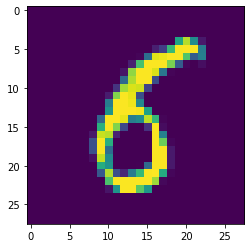

Prediction: 5 - Label: 6.0	


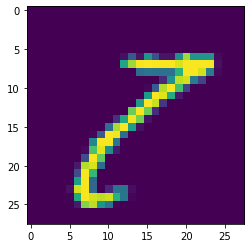

Prediction: 8 - Label: 7.0	


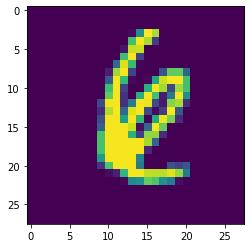

Prediction: 8 - Label: 6.0	


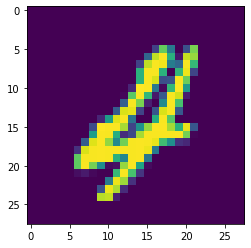

Prediction: 2 - Label: 4.0	


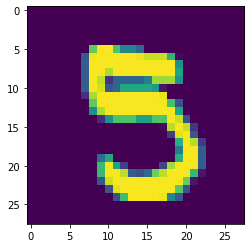

Prediction: 3 - Label: 5.0	


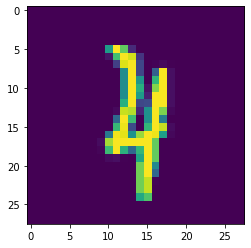

Prediction: 7 - Label: 4.0	


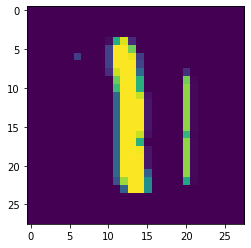

Prediction: 8 - Label: 1.0	


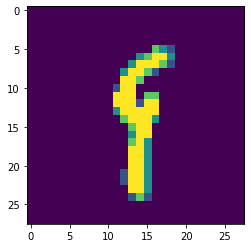

Prediction: 1 - Label: 9.0	


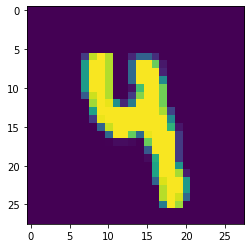

Prediction: 9 - Label: 4.0	


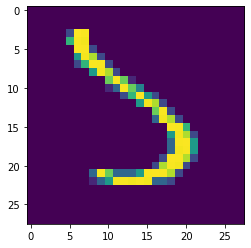

Prediction: 3 - Label: 5.0	


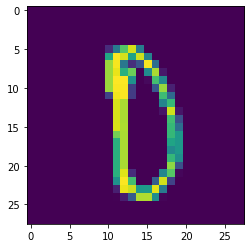

Prediction: 8 - Label: 0.0	


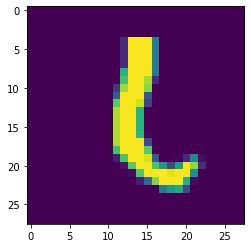

Prediction: 1 - Label: 6.0	


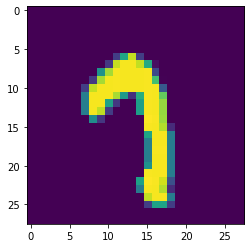

Prediction: 9 - Label: 7.0	


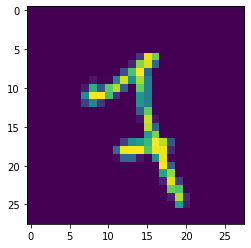

Prediction: 1 - Label: 7.0	


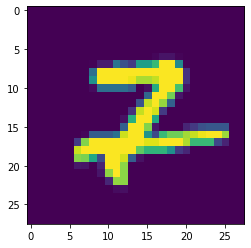

Prediction: 2 - Label: 7.0	


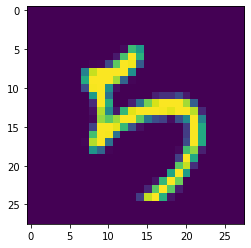

Prediction: 9 - Label: 5.0	


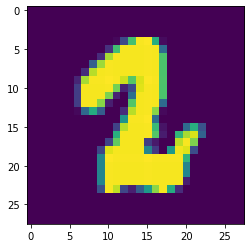

Prediction: 8 - Label: 2.0	


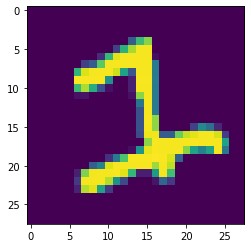

Prediction: 2 - Label: 1.0	


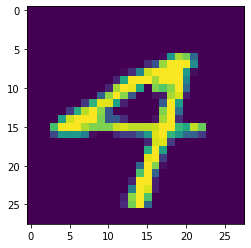

Prediction: 7 - Label: 4.0	


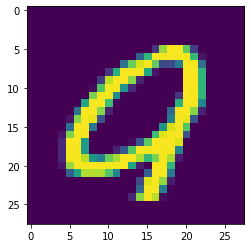

Prediction: 0 - Label: 9.0	


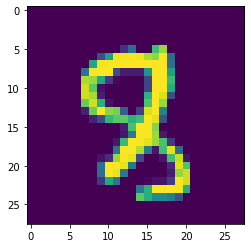

Prediction: 2 - Label: 8.0	


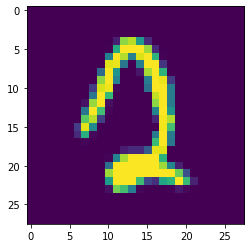

Prediction: 0 - Label: 2.0	


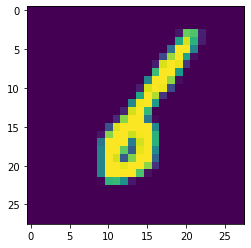

Prediction: 1 - Label: 6.0	


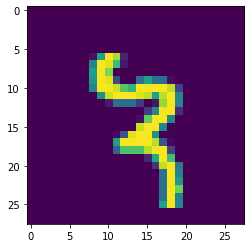

Prediction: 9 - Label: 3.0	


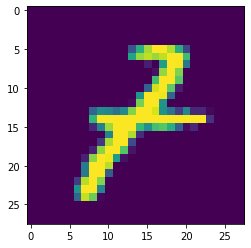

Prediction: 2 - Label: 7.0	


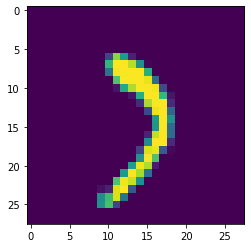

Prediction: 9 - Label: 7.0	


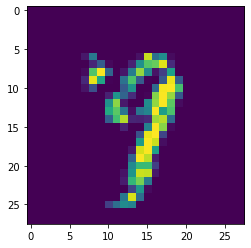

Prediction: 7 - Label: 9.0	


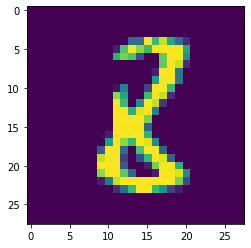

Prediction: 2 - Label: 8.0	


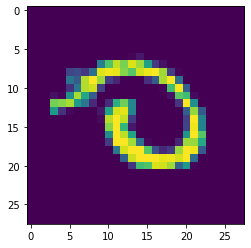

Prediction: 3 - Label: 0.0	


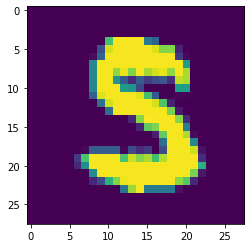

Prediction: 3 - Label: 5.0	


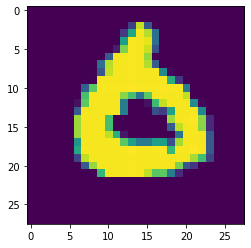

Prediction: 0 - Label: 6.0	


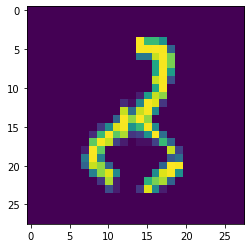

Prediction: 2 - Label: 8.0	


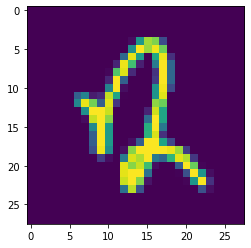

Prediction: 4 - Label: 2.0	


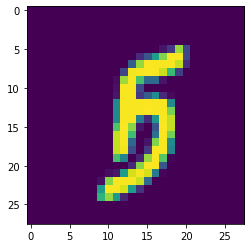

Prediction: 8 - Label: 5.0	


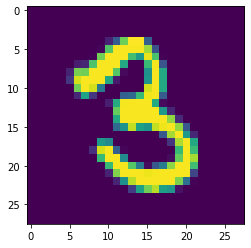

Prediction: 8 - Label: 3.0	


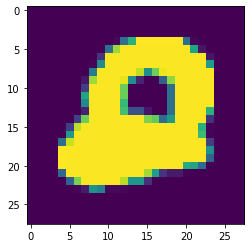

Prediction: 0 - Label: 2.0	


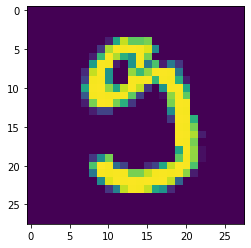

Prediction: 0 - Label: 9.0	


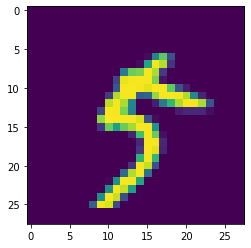

Prediction: 9 - Label: 5.0	


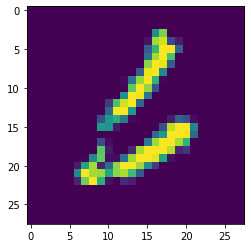

Prediction: 3 - Label: 6.0	


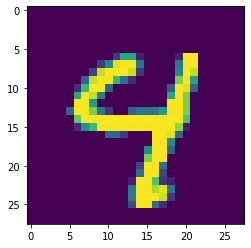

Prediction: 9 - Label: 4.0	


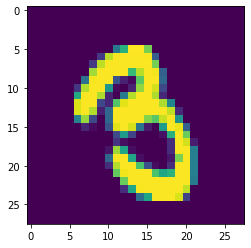

Prediction: 8 - Label: 3.0	


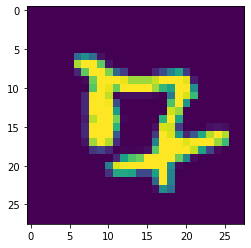

Prediction: 0 - Label: 7.0	


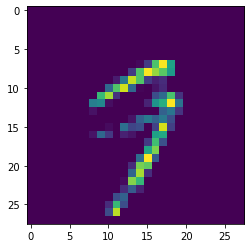

Prediction: 7 - Label: 9.0	


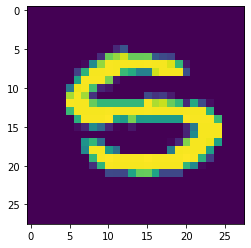

Prediction: 9 - Label: 5.0	


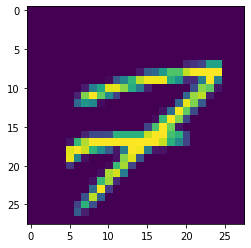

Prediction: 9 - Label: 7.0	


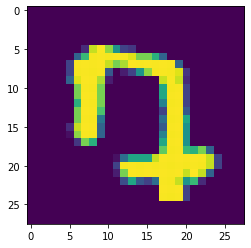

Prediction: 4 - Label: 7.0	


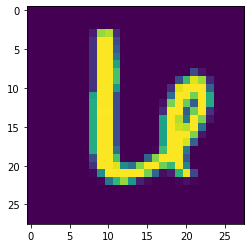

Prediction: 0 - Label: 6.0	


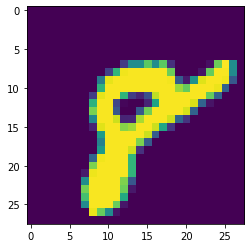

Prediction: 9 - Label: 8.0	


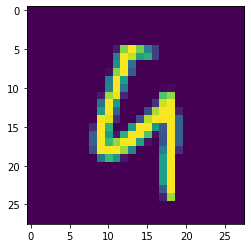

Prediction: 4 - Label: 9.0	


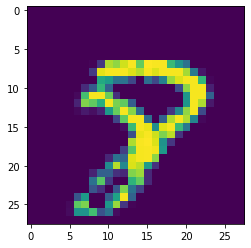

Prediction: 9 - Label: 8.0	


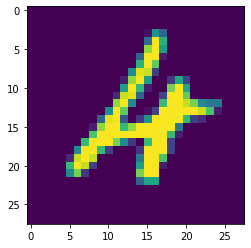

Prediction: 2 - Label: 4.0	


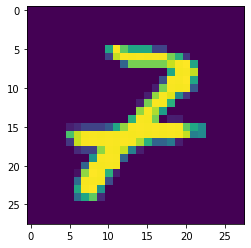

Prediction: 2 - Label: 7.0	


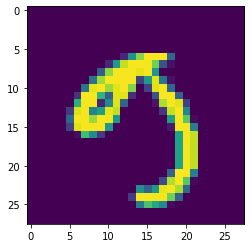

Prediction: 7 - Label: 9.0	


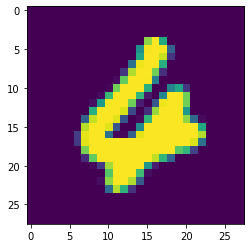

Prediction: 6 - Label: 4.0	


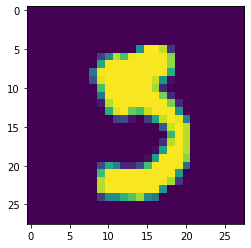

Prediction: 3 - Label: 5.0	


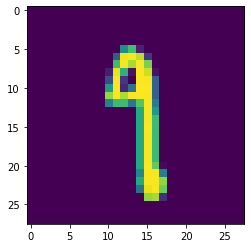

Prediction: 1 - Label: 9.0	


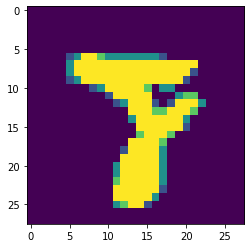

Prediction: 7 - Label: 8.0	


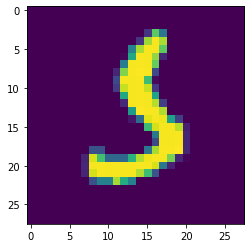

Prediction: 3 - Label: 5.0	


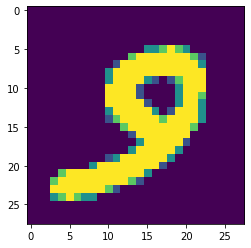

Prediction: 3 - Label: 9.0	


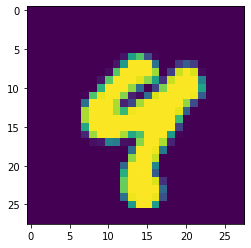

Prediction: 9 - Label: 4.0	


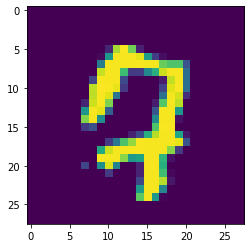

Prediction: 9 - Label: 7.0	


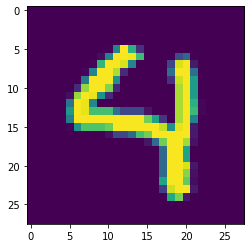

Prediction: 9 - Label: 4.0	


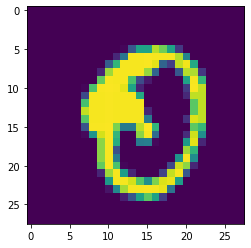

Prediction: 8 - Label: 0.0	


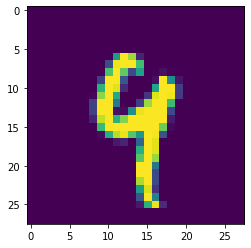

Prediction: 4 - Label: 9.0	


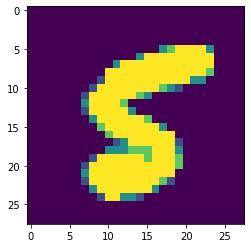

Prediction: 8 - Label: 5.0	


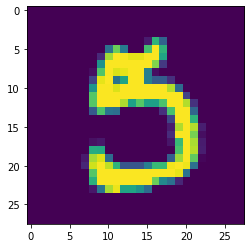

Prediction: 3 - Label: 5.0	


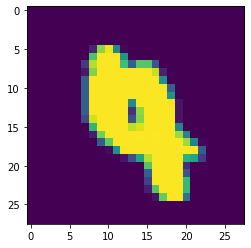

Prediction: 9 - Label: 4.0	


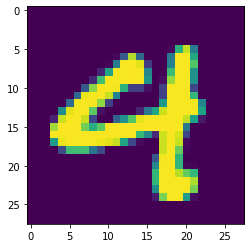

Prediction: 9 - Label: 4.0	


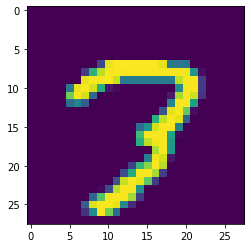

Prediction: 7 - Label: 3.0	


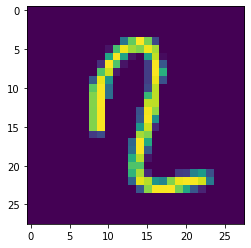

Prediction: 8 - Label: 2.0	


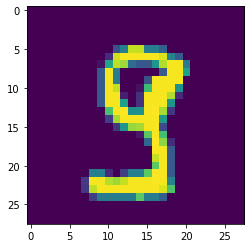

Prediction: 3 - Label: 9.0	


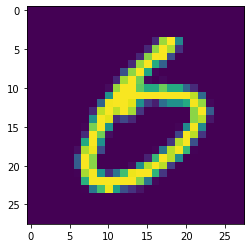

Prediction: 0 - Label: 6.0	


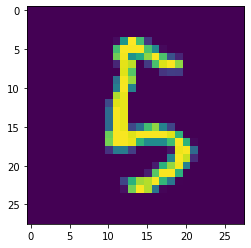

Prediction: 8 - Label: 5.0	


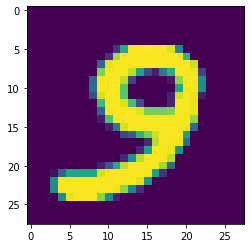

Prediction: 3 - Label: 9.0	


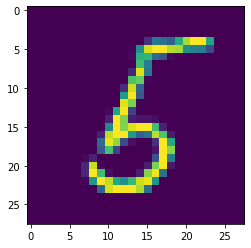

Prediction: 6 - Label: 5.0	


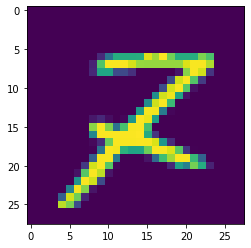

Prediction: 2 - Label: 7.0	


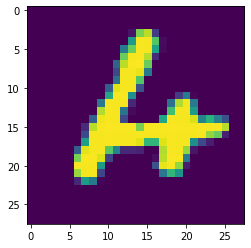

Prediction: 6 - Label: 4.0	


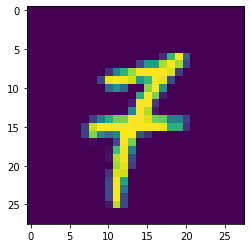

Prediction: 9 - Label: 7.0	


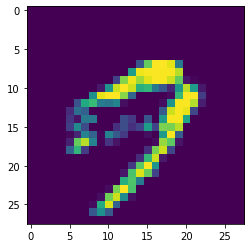

Prediction: 7 - Label: 9.0	


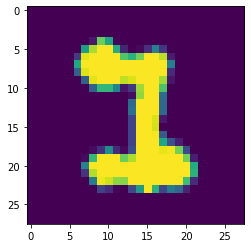

Prediction: 2 - Label: 1.0	


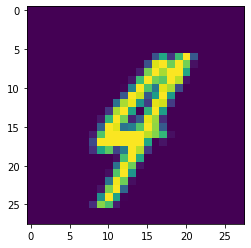

Prediction: 9 - Label: 4.0	


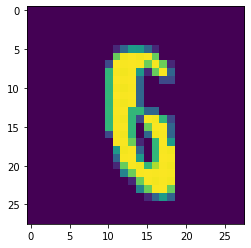

Prediction: 8 - Label: 6.0	


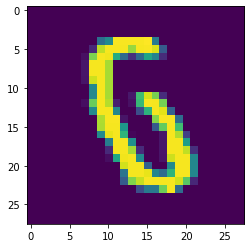

Prediction: 8 - Label: 6.0	


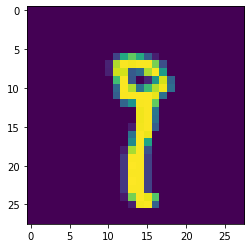

Prediction: 1 - Label: 9.0	


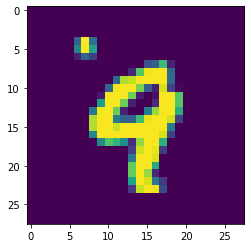

Prediction: 4 - Label: 9.0	


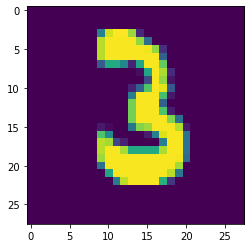

Prediction: 2 - Label: 3.0	


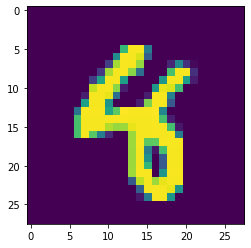

Prediction: 4 - Label: 8.0	


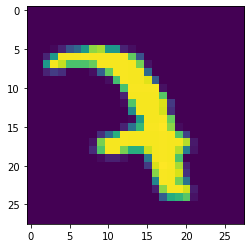

Prediction: 3 - Label: 7.0	


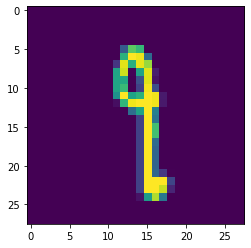

Prediction: 1 - Label: 9.0	


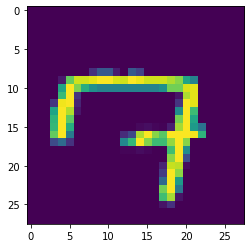

Prediction: 9 - Label: 7.0	


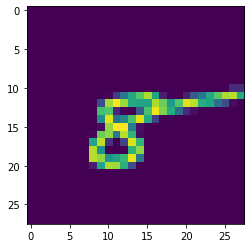

Prediction: 5 - Label: 8.0	


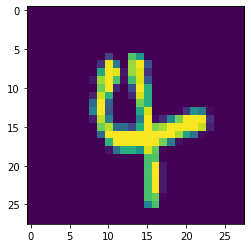

Prediction: 7 - Label: 4.0	


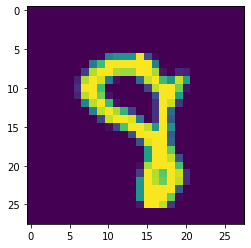

Prediction: 9 - Label: 8.0	


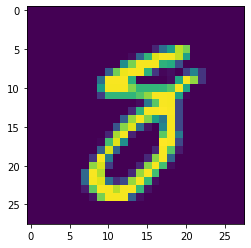

Prediction: 3 - Label: 8.0	


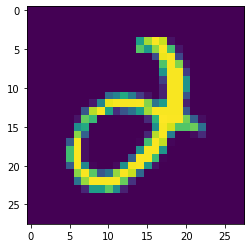

Prediction: 3 - Label: 2.0	


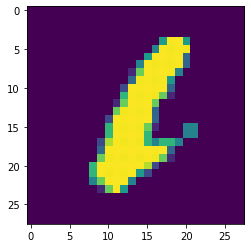

Prediction: 6 - Label: 1.0	


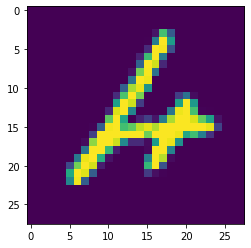

Prediction: 2 - Label: 4.0	


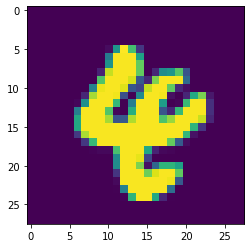

Prediction: 8 - Label: 4.0	


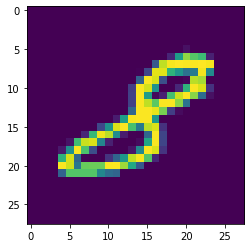

Prediction: 3 - Label: 8.0	


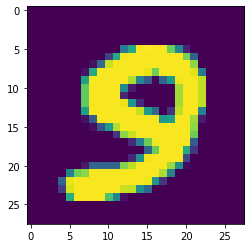

Prediction: 3 - Label: 9.0	


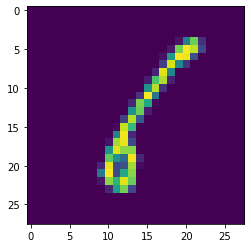

Prediction: 1 - Label: 6.0	


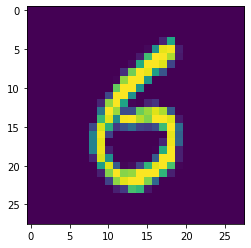

Prediction: 5 - Label: 6.0	


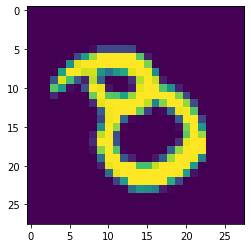

Prediction: 3 - Label: 8.0	


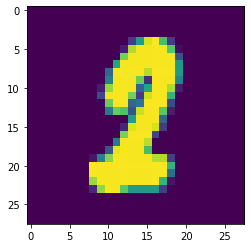

Prediction: 8 - Label: 2.0	


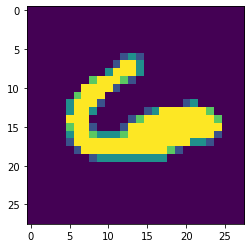

Prediction: 2 - Label: 6.0	


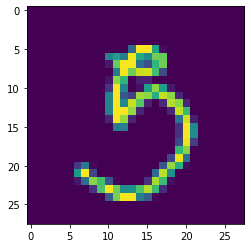

Prediction: 3 - Label: 5.0	


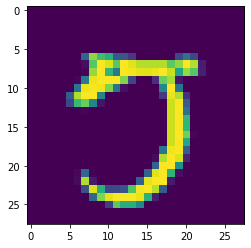

Prediction: 7 - Label: 5.0	


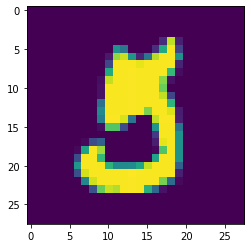

Prediction: 8 - Label: 5.0	


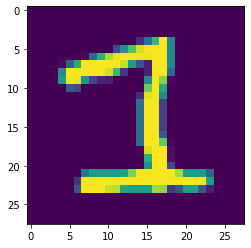

Prediction: 2 - Label: 1.0	


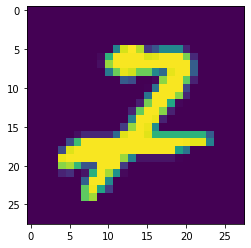

Prediction: 2 - Label: 7.0	


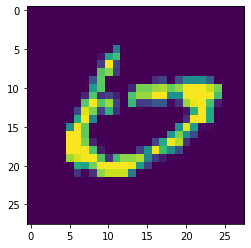

Prediction: 0 - Label: 6.0	


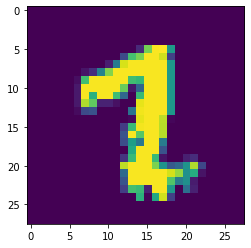

Prediction: 1 - Label: 2.0	


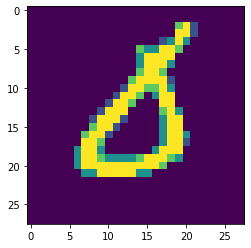

Prediction: 6 - Label: 0.0	


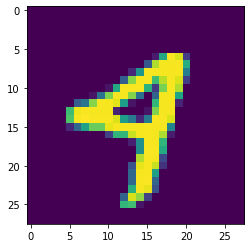

Prediction: 9 - Label: 4.0	


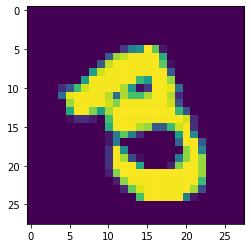

Prediction: 8 - Label: 3.0	


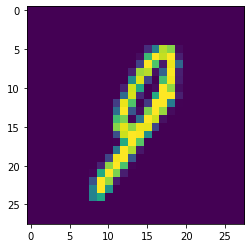

Prediction: 1 - Label: 9.0	


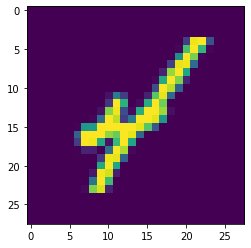

Prediction: 1 - Label: 4.0	


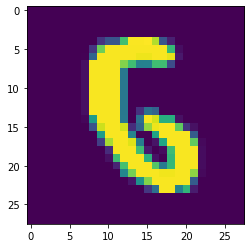

Prediction: 5 - Label: 6.0	


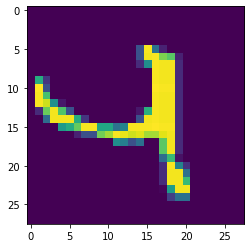

Prediction: 2 - Label: 4.0	


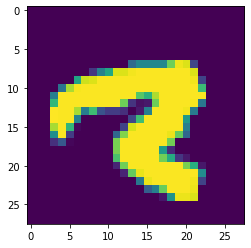

Prediction: 8 - Label: 2.0	


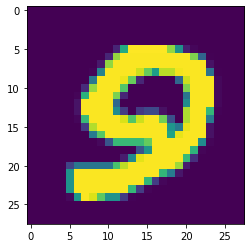

Prediction: 8 - Label: 9.0	


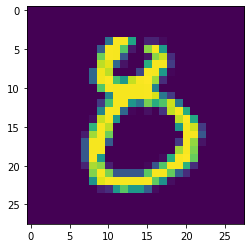

Prediction: 0 - Label: 8.0	


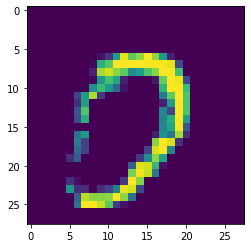

Prediction: 7 - Label: 0.0	


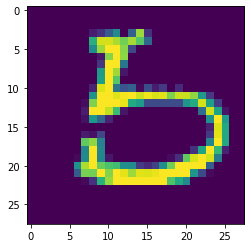

Prediction: 6 - Label: 5.0	


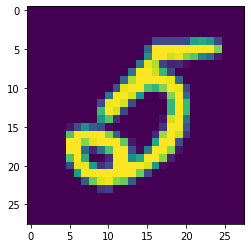

Prediction: 0 - Label: 5.0	


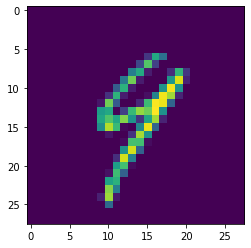

Prediction: 4 - Label: 9.0	


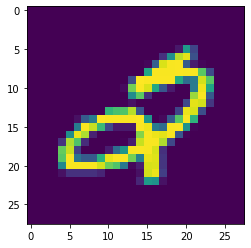

Prediction: 3 - Label: 2.0	


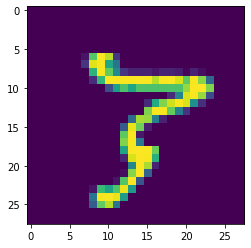

Prediction: 7 - Label: 3.0	


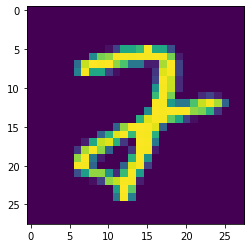

Prediction: 3 - Label: 2.0	


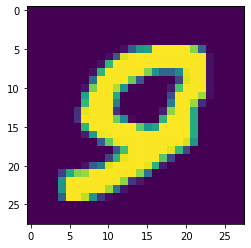

Prediction: 2 - Label: 9.0	


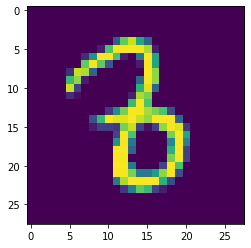

Prediction: 3 - Label: 8.0	


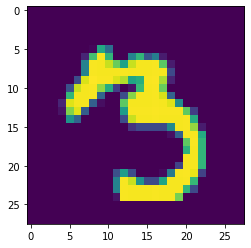

Prediction: 9 - Label: 3.0	


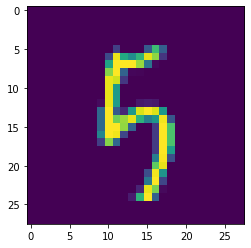

Prediction: 9 - Label: 5.0	


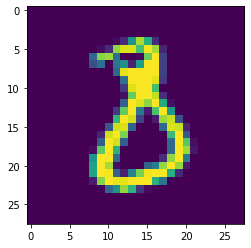

Prediction: 2 - Label: 8.0	


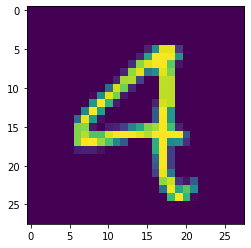

Prediction: 9 - Label: 4.0	


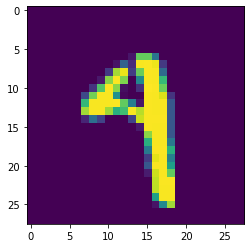

Prediction: 9 - Label: 4.0	


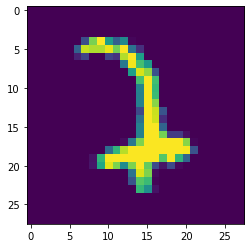

Prediction: 2 - Label: 7.0	


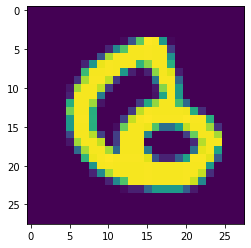

Prediction: 8 - Label: 6.0	


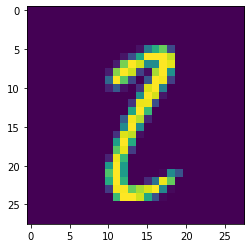

Prediction: 8 - Label: 2.0	


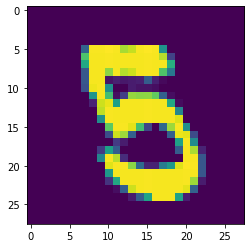

Prediction: 8 - Label: 5.0	


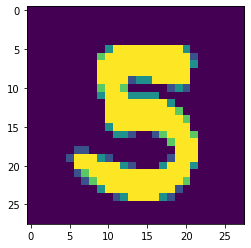

Prediction: 8 - Label: 5.0	


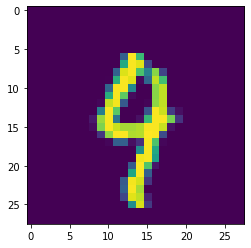

Prediction: 9 - Label: 4.0	


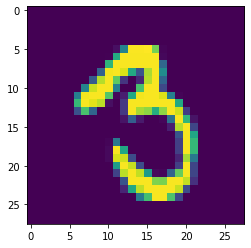

Prediction: 8 - Label: 3.0	


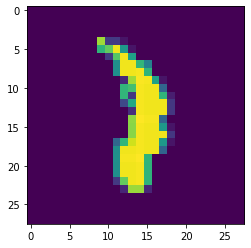

Prediction: 7 - Label: 1.0	


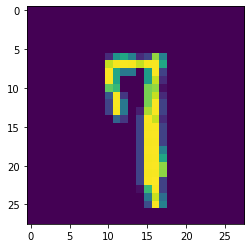

Prediction: 9 - Label: 7.0	


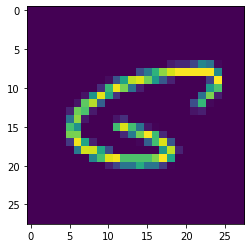

Prediction: 5 - Label: 6.0	


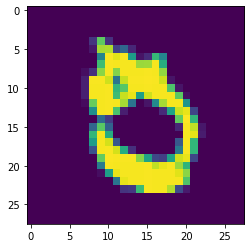

Prediction: 0 - Label: 5.0	


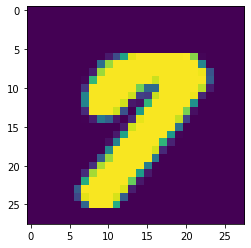

Prediction: 9 - Label: 7.0	


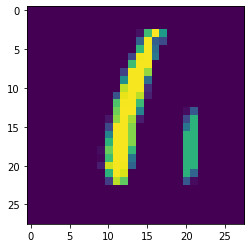

Prediction: 6 - Label: 1.0	


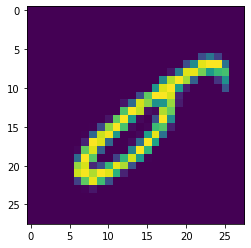

Prediction: 8 - Label: 0.0	


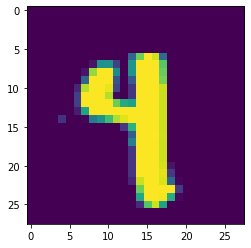

Prediction: 9 - Label: 4.0	


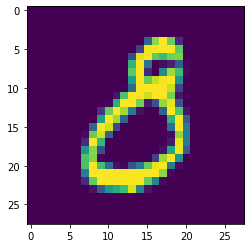

Prediction: 3 - Label: 8.0	


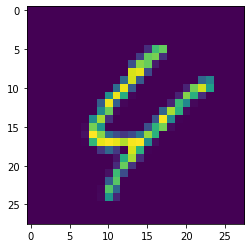

Prediction: 9 - Label: 4.0	


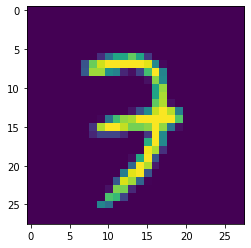

Prediction: 3 - Label: 7.0	


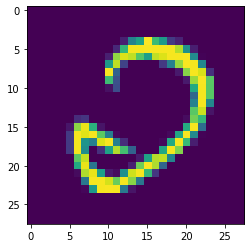

Prediction: 0 - Label: 2.0	


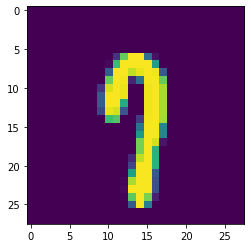

Prediction: 9 - Label: 7.0	


In [ ]:
# downloading .pt files from MNIST dataset

trainset = datasets.MNIST('/content/gdrive/My Drive/ML Projects/MNIST Dataset', download=True, train= True, transform=transform)
valset = datasets.MNIST('/content/gdrive/My Drive/ML Projects/MNIST Dataset', download=True, train= False, transform=transform)

train_set = torch.load('/content/gdrive/My Drive/ML Projects/MNIST Dataset/MNIST/processed/training.pt')
test_set = torch.load('/content/gdrive/My Drive/ML Projects/MNIST Dataset/MNIST/processed/test.pt')

train_images = np.asarray(train_set[0])
train_labels = np.asarray(train_set[1])
test_images = np.asarray(test_set[0])
test_labels = np.asarray(test_set[1])

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

class dataset():
    def __init__(self, data, labels, train, test): 
        self.data = data
        self.labels = labels
        self.train = train
        self.test = test
            
    def __getitem__(self, index):     
        
        def normalizePlanes(npzarray, max_value = 255., min_value = 0.):
            npzarray = (npzarray - min_value) / (max_value - min_value)
            npzarray[npzarray>1] = 1
            npzarray[npzarray<0] = 0
            return npzarray
        
        x = self.data[index]
        y = self.labels[index]
        pre_x = normalizePlanes(x, 255., 0.)
        pre_y = y
        
        x = torch.from_numpy(pre_x)
        y = torch.from_numpy(np.asarray(pre_y, dtype=np.float))
      
        new_x = x.repeat(1,1,1)
        new_y = y

        return new_x, new_y
    
    def __len__(self):
        return len(self.data)

class features(nn.Module):
    def __init__(self):
        super(features, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 16, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size = 3, padding = 1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1) 
        
        self.relu = nn.ReLU(inplace=True)
        self.mp = nn.MaxPool2d(kernel_size = 2, stride = 2, return_indices = False)
                  
    def forward(self, x):
        x = self.relu(self.conv1(x))             
        x = self.mp(x)      
        x = self.relu(self.conv2(x))        
        x = self.mp(x)  
        x = self.relu(self.conv3(x))      
        return x

class classifier(nn.Module):
    def __init__(self):
        super(classifier, self).__init__()

        self.input_size = 7*7*64
        self.hidden_sizes = [128, 64]
        self.output_size = 10

        self.fc1 = nn.Linear(self.input_size, self.hidden_sizes[0])
        self.fc2 = nn.Linear(self.hidden_sizes[0], self.hidden_sizes[1])
        self.fc3 = nn.Linear(self.hidden_sizes[1], self.output_size)
                
        self.relu = nn.ReLU(inplace=True)
        self.softmax= nn.LogSoftmax()
    
    def forward(self, x):      
        x = x.view(x.shape[0],-1)  
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

class mnist_model(nn.Module):
    def __init__(self):
        super(mnist_model, self).__init__()
        self.features = features()
        self.classifier = classifier()
    
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x  

def train_model(model, num_epochs, criterion, optimizer):
    train_hist = []
    valid_hist = []

    for epoch in range(num_epochs):
        print()
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
              
        running_loss = 0.0
        model.train()

        # Iterate over data.
        for inputs, labels in trainloader:
            inputs = inputs.to(DEVICE, dtype = torch.float)
            labels = labels.to(DEVICE, dtype = torch.float)
 
            with torch.set_grad_enabled(True):
                outputs = model(inputs) # forward pass
                loss = criterion(outputs, labels.long())

            optimizer.zero_grad() # zero the parameter gradients
            loss.backward() # backward + optimize only if in training phase
            optimizer.step()
                
        model.eval()
        with torch.no_grad():  # now we are doing inference only, so we do not need gradient                      
            train_loss = 0.
            for i, (inputs, labels) in enumerate(trainloader):            
                inputs = inputs.to(DEVICE, dtype = torch.float)
                labels = labels.to(DEVICE, dtype = torch.float)                 
                outputs = model(inputs)
                train_loss += criterion(outputs, labels.long()) 

            train_loss /= (i + 1)
            train_hist.append(train_loss.item())
            print('....train loss: {:.3f}'.format(train_loss.item()))

            if validloader is None:
                print()
                continue
            
            valid_loss = 0.
            for i, (inputs, labels) in enumerate(validloader):
                inputs = inputs.to(DEVICE, dtype = torch.float)
                labels = labels.to(DEVICE, dtype = torch.float)
                
                outputs = model(inputs) # forward pass
                valid_loss += criterion(outputs, labels.long())  # accumulate the loss of the mini-batch
                
            valid_loss /= (i + 1)
            valid_hist.append(valid_loss.item())                     
            print('....valid loss: {:.3f}'.format(valid_loss.item()))

    return model, train_hist, valid_hist

# splitting training set into training and validation

train_dataset = dataset(train_images[0:50000], train_labels[0:50000], train = True, test = False)
valid_dataset = dataset(train_images[50000:], train_labels[50000:], train = False, test = True)
test_dataset = dataset(test_images, test_labels, train = False, test = True)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size = 128, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size = len(test_dataset), shuffle=True)

num_epochs = 20
lr = 0.001

model = mnist_model()
model.to(DEVICE, dtype=torch.float) 

optimizer = torch.optim.SGD(model.parameters(), lr = lr, momentum = 0.9)
criterion = nn.NLLLoss()

model, train_loss, valid_loss = train_model(model, num_epochs, criterion, optimizer)

plt.figure()
plt.plot(range(num_epochs), train_loss, 'b-', label='train loss')
plt.plot(range(num_epochs), valid_loss, 'r-', label='valid loss')
plt.xlabel('epochs')
plt.xticks(np.arange(0, num_epochs, step=10))
plt.ylabel('loss')
plt.legend()
plt.show()

print('--------------- EVALUATION ---------------')

test_labels = np.array([])
test_output = np.array([])
test_input = np.array([])

model.eval()
with torch.no_grad():  # now we are doing inference only, so we do not need gradient                      
    for i, (inputs, labels) in enumerate(testloader):
        image = np.copy(inputs)
        inputs = inputs.to(DEVICE, dtype = torch.float)
        labels = labels.to(DEVICE, dtype = torch.float)
        outputs = model(inputs)
        
        label = labels.cpu().numpy()
        out = outputs.cpu().numpy()
        inp = inputs.cpu().numpy()

        if len(test_labels) == 0:
            test_labels = label
        else: 
            test_labels = np.concatenate((test_labels, label), axis = 0)
        if len(test_output) == 0:
            test_output = out
        else:
            test_output = np.concatenate((test_output, out), axis = 0)
        if len(test_input) == 0:
            test_input = image
        else:
            test_input = np.concatenate((test_input, image), axis = 0)

test_errors = []
error_labels = []
error_preds = []
preds = []
n_errors = 0

for j in range(test_output.shape[0]):
    probs = list(test_output[j])
    pred = probs.index(max(list(probs)))
    preds.append(pred)

    if pred != test_labels[j]:
      n_errors += 1
      error_preds.append(pred)
      error_labels.append(test_labels[j])
      test_errors.append(test_input[j])

print('Number of errors: {}\t' .format(n_errors))     
print(test_labels.shape)
print(np.asarray(preds).shape)

target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(test_labels, np.asarray(preds), target_names=target_names))

print('--------------- CHECKING ERRORS ---------------')
print()

for i in range(len(test_errors)):
    plt.imshow(test_errors[i].squeeze())
    plt.show()
    print('Prediction: {} - Label: {}\t' .format(error_preds[i], error_labels[i]))